In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.shape,data.duplicated().sum()

((302, 14), 0)

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


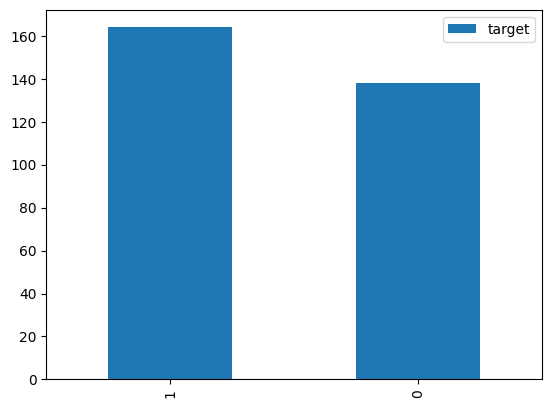

In [12]:
data.target.value_counts().plot(kind='bar')
plt.legend()

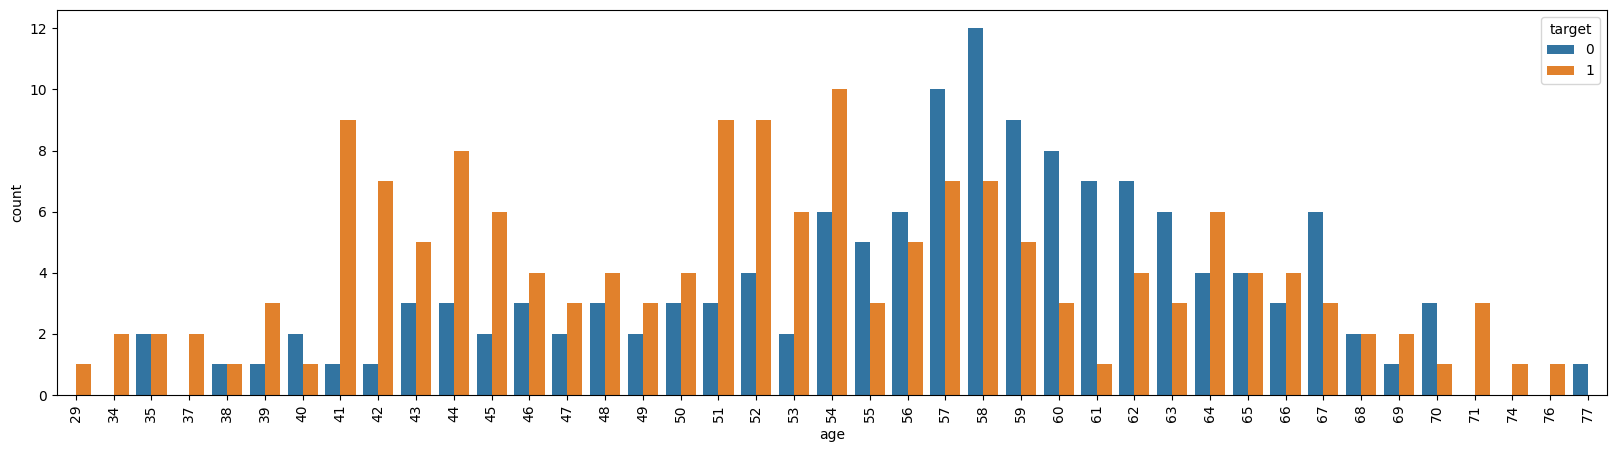

In [13]:
plt.figure(figsize = (20,5))
sns.countplot(x = data.age, hue = data.target)
plt.xticks(rotation = 90)
plt.show()

<Axes: >

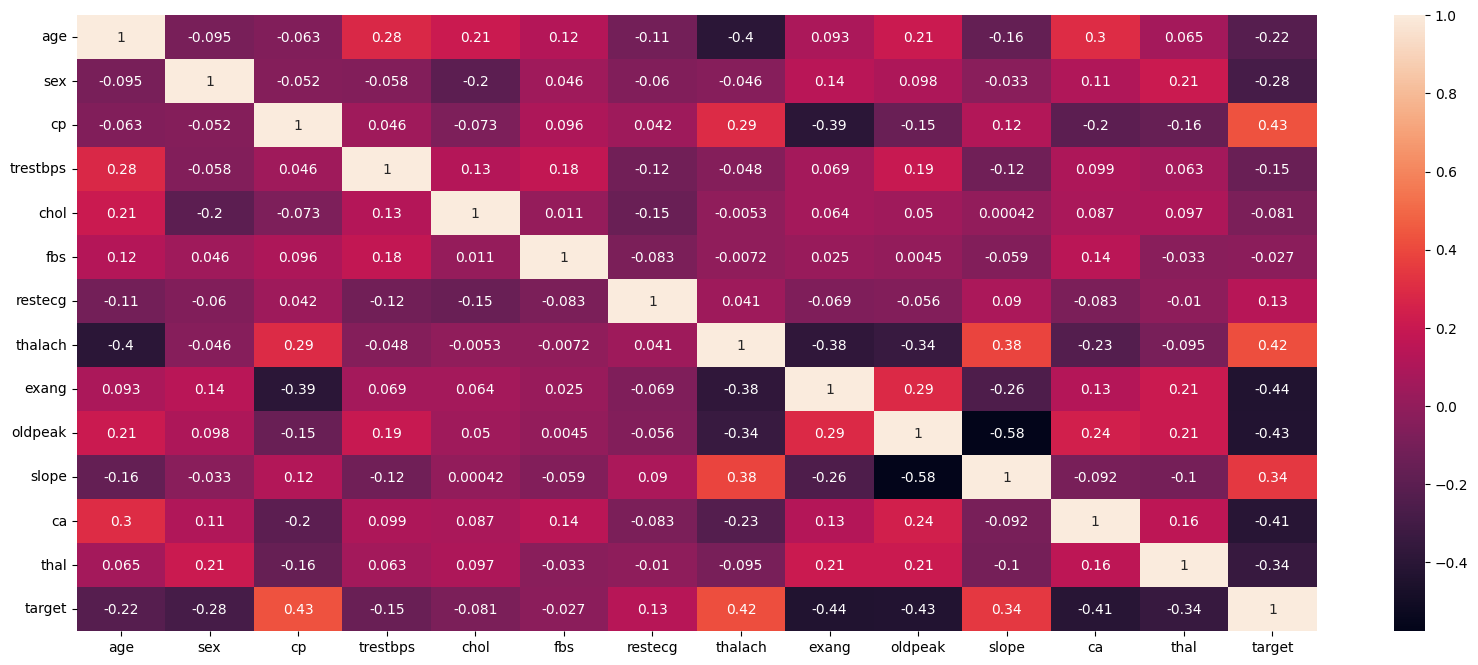

In [14]:
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(), annot = True)

In [17]:
x = data.drop('target',axis = 1)
y = data.target

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [24]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [27]:
ypred_lr = lr.predict(xtest)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
confusion_matrix(ytest,ypred_lr), accuracy_score(ytest,ypred_lr)

(array([[34,  8],
        [ 8, 41]]),
 0.8241758241758241)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier()

In [32]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [33]:
ypred_dt = dt.predict(xtest)

In [34]:
confusion_matrix(ytest,ypred_dt), accuracy_score(ytest,ypred_dt)

(array([[35,  7],
        [ 9, 40]]),
 0.8241758241758241)

In [36]:
from sklearn.tree import export_graphviz
import graphviz

In [59]:
dt_data = export_graphviz(dt,feature_names=xtrain.columns)

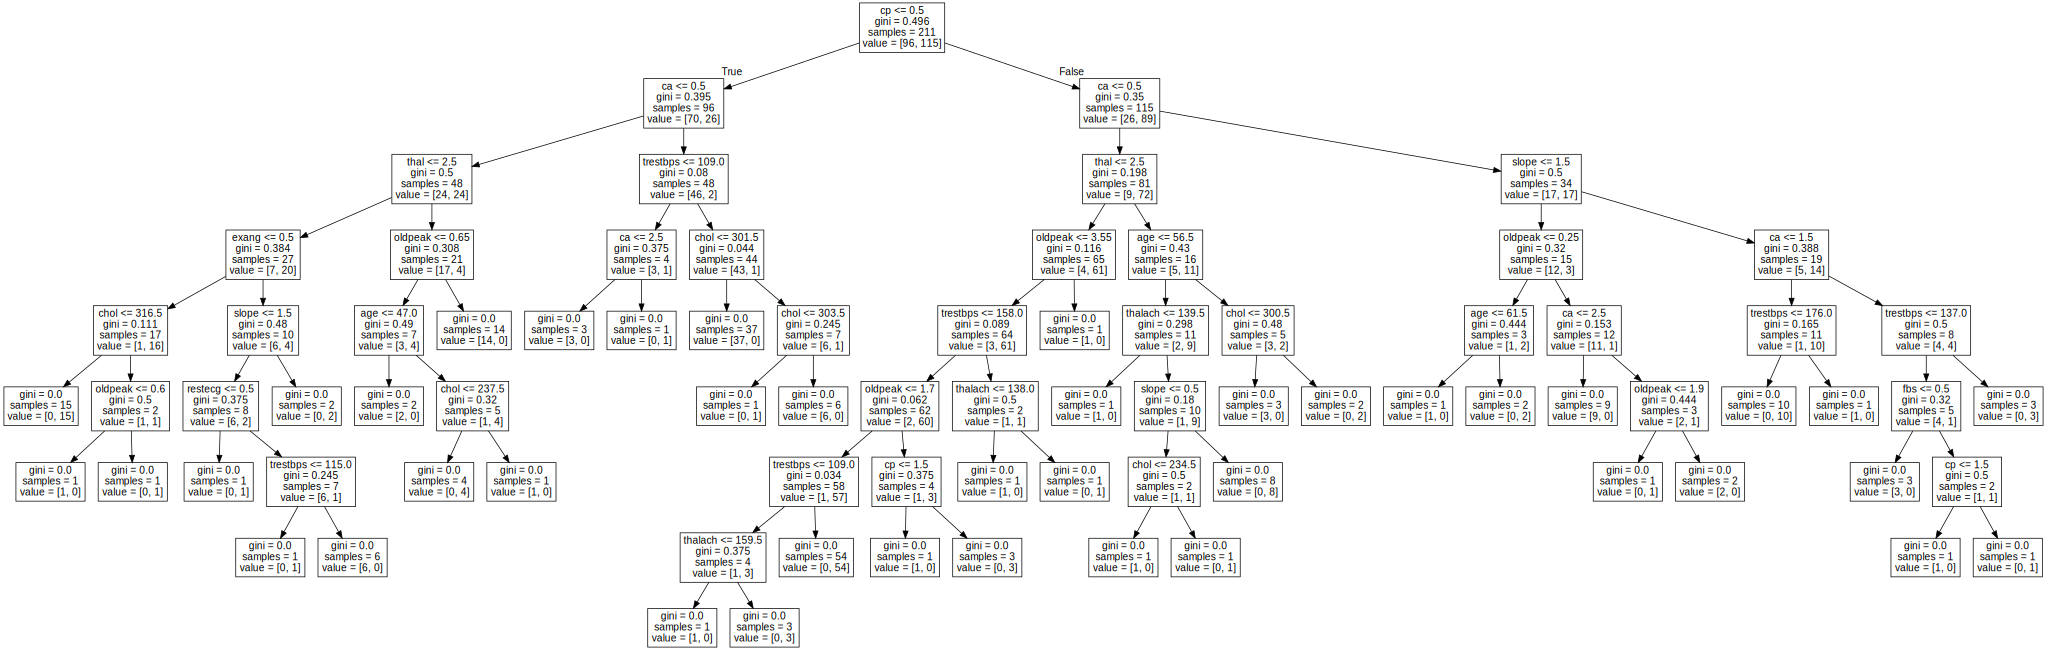

In [60]:
graphviz.Source(dt_data)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf = RandomForestClassifier(random_state = 42)

In [97]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [98]:
ypred_rf = rf.predict(xtest)

In [99]:
confusion_matrix(ytest,ypred_rf), accuracy_score(ytest,ypred_rf)

(array([[36,  6],
        [ 8, 41]]),
 0.8461538461538461)

In [100]:
import graphviz

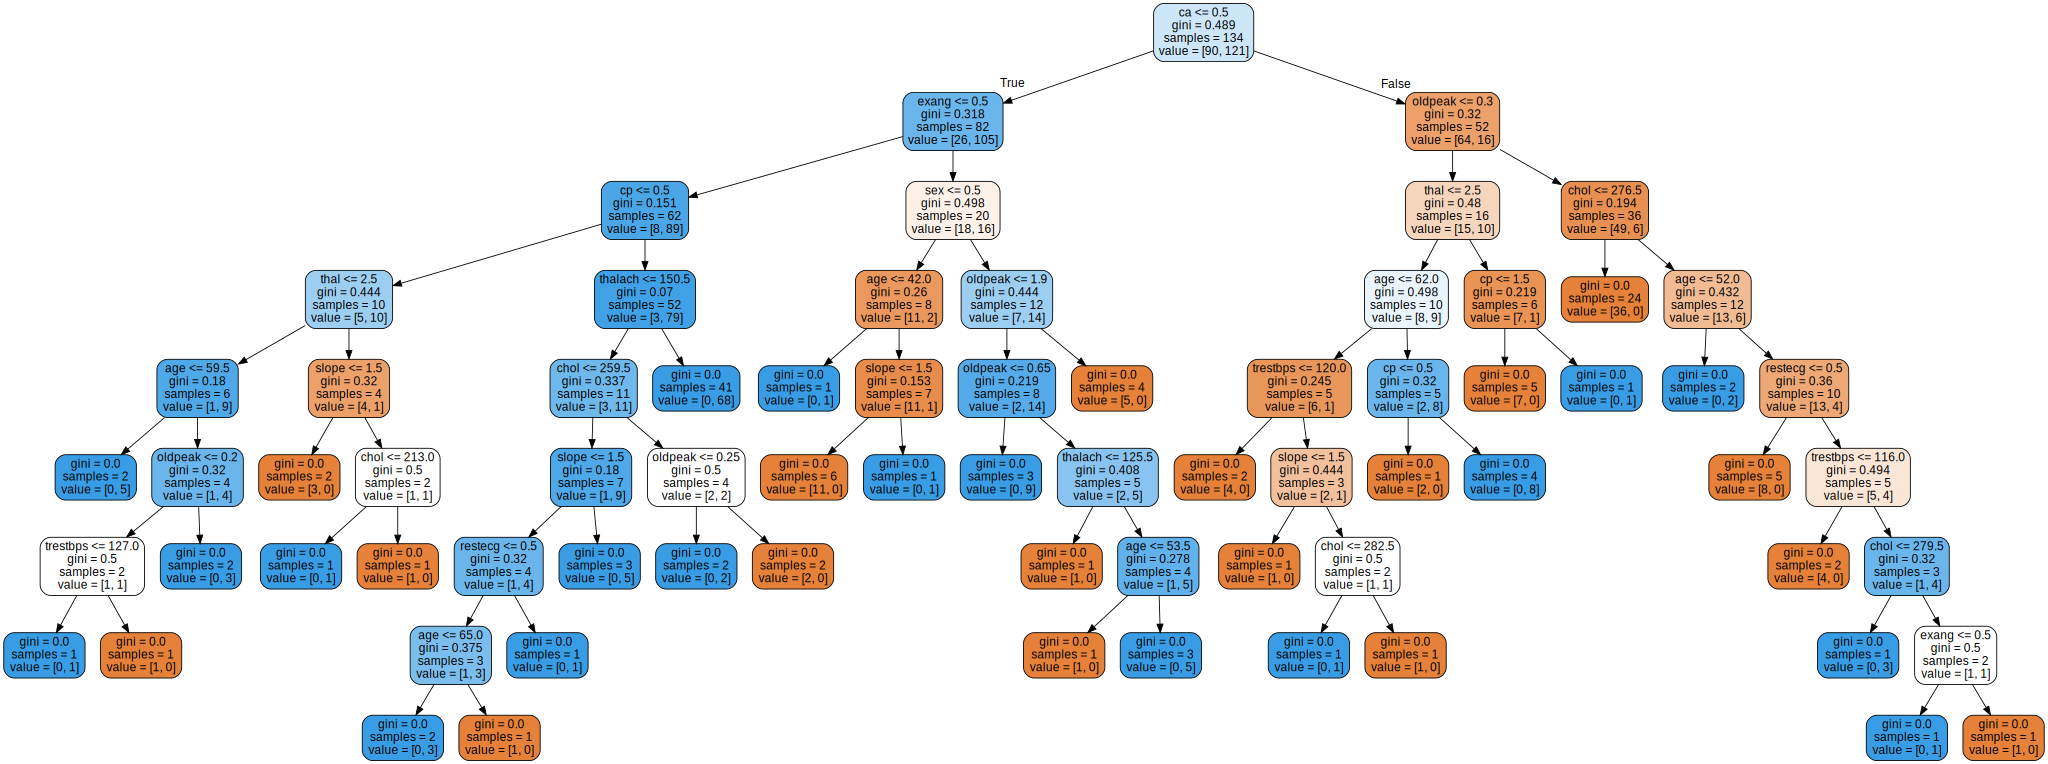

In [101]:
dot = export_graphviz(rf.estimators_[1],feature_names=xtrain.columns,filled=True,rounded=True)
graphviz.Source(dot)

DecisionTreeClassifier(max_features='sqrt', random_state=682835630)

In [102]:
confusion_matrix(ytest,ypred_lr), confusion_matrix(ytest,ypred_dt), confusion_matrix(ytest,ypred_rf)

(array([[34,  8],
        [ 8, 41]]),
 array([[35,  7],
        [ 9, 40]]),
 array([[36,  6],
        [ 8, 41]]))

In [105]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(ytest,ypred_lr))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [112]:
print(classification_report(ytest,ypred_dt))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.85      0.82      0.83        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [113]:
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.87      0.84      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [121]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [124]:
print(precision_score(ytest,ypred_lr))
print(precision_score(ytest,ypred_dt))
print(precision_score(ytest,ypred_rf))

0.8367346938775511
0.851063829787234
0.8723404255319149


In [125]:
print(recall_score(ytest,ypred_lr))
print(recall_score(ytest,ypred_dt))
print(recall_score(ytest,ypred_rf))

0.8367346938775511
0.8163265306122449
0.8367346938775511


In [126]:
print(f1_score(ytest,ypred_lr))
print(f1_score(ytest,ypred_dt))
print(f1_score(ytest,ypred_rf))

0.8367346938775511
0.8333333333333334
0.8541666666666667


In [127]:
from sklearn.metrics import ConfusionMatrixDisplay

In [128]:
cm_lr = confusion_matrix(ytest,ypred_lr)
cm_dt = confusion_matrix(ytest,ypred_dt)
cm_rf = confusion_matrix(ytest,ypred_rf)

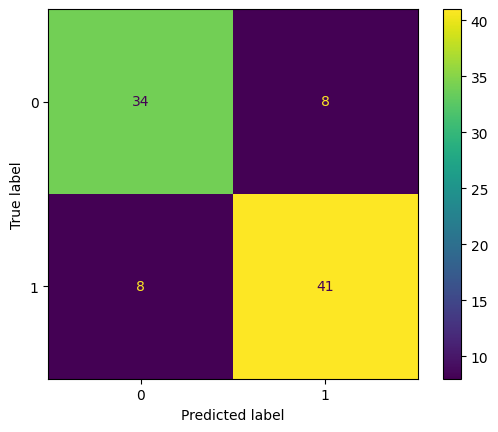

In [130]:
ConfusionMatrixDisplay(cm_lr).plot()

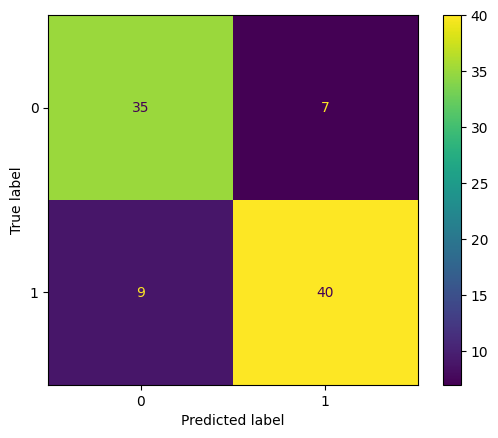

In [131]:
ConfusionMatrixDisplay(cm_dt).plot()

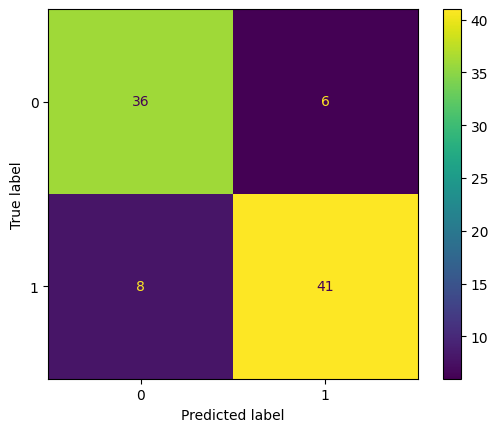

In [132]:
ConfusionMatrixDisplay(cm_rf).plot()

As in this situation FN (person having heart disease but predicted as no heart disease) is crucial hence we have to look a better recall score as per recall score logistic regression and random forest both performed eqaully but we will take random forest for this problem as it has a better precision score and accuracy also ith has a scope of better performance using hyper-parameter tuning.